### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [50]:
import pandas as pd

df_org = pd.read_csv('uber-raw-data-aug14.csv')
df_org.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [83]:
# Convert the 'Date/Time' column to datetime format
df = pd.DataFrame(df_org)
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format = '%Y/%m/%d %H:%M:%S')
df['Date'] = df['Date/Time'].dt.date

# Group by date and count the number of pickups
dtgroup = df.groupby('Date')['Base'].count()

# Find the date with the highest number of pickups
print(dtgroup.idxmax())



2014-08-07


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [33]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
df2 = df[ df['Date'] == dtgroup.idxmax() ]

# Get the count of pickups on the highest date
pickup=df2.groupby('Date')['Base'].count()
for row in pickup:
    print(row)


32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [37]:
# Count the number of unique TLC base companies
tlc = df.groupby('Base')['Base'].count()
tlc_cnt = list(tlc.index)
print(len(tlc_cnt))



5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [41]:
# Group by TLC base company and count the number of pickups

#tlc grouping already done in Q3 and stored in 'tlc'

# Find the TLC base company with the highest number of pickups
print(tlc.idxmax())


B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [46]:
# Group by TLC base company and count the number of pickups
tlc_df = pd.DataFrame({'Base': list(tlc.index),'Count':list(tlc)})
display(tlc_df)


,Base,Count
0,B02512,31472
1,B02598,220129
2,B02617,355803
3,B02682,173280
4,B02764,48591


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [73]:
# Extract the hour from the 'Date/Time' column
hour_df = pd.read_csv('uber-raw-data-aug14.csv')
hour_df['Date/Time'] = pd.to_datetime(hour_df['Date/Time'], format = '%m/%d/%Y %H:%M:%S')
hour_df['Hour'] = hour_df['Date/Time'].dt.floor("H").dt.hour

# Group by hour and count the number of pickups
hr_grp = hour_df.groupby('Hour')['Hour'].count()

# Find the hour with the highest number of pickups
print(hr_grp.idxmax())



17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

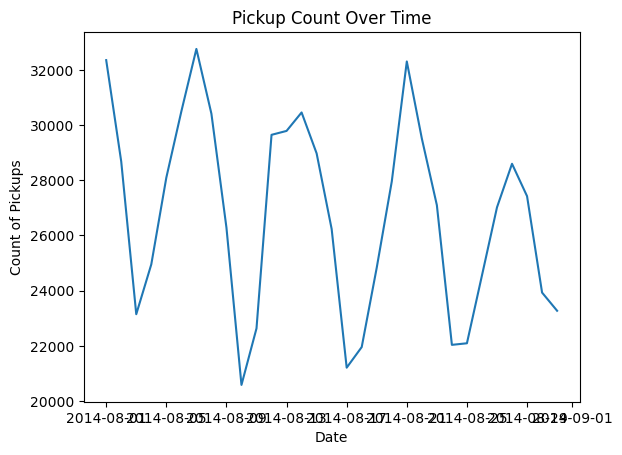

In [84]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
date_cnt = pd.DataFrame({'Date':list(dtgroup.index), 'Count':list(dtgroup)})

# Create a line plot to visualize the number of pickups over time
plt.plot(date_cnt['Date'], date_cnt['Count'])
plt.title('Pickup Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Pickups')
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

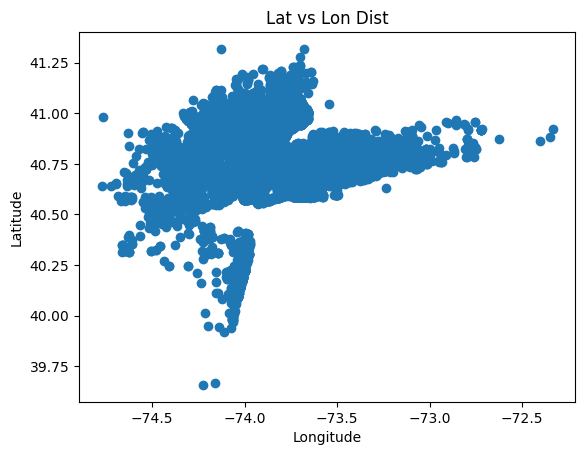

In [85]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
#df_org has the raw data from csv, hence feeding latitiude in y-axis and longitude in x-axis
plt.scatter(df_org['Lon'],df_org['Lat'])   
plt.title('Lat vs Lon Dist')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

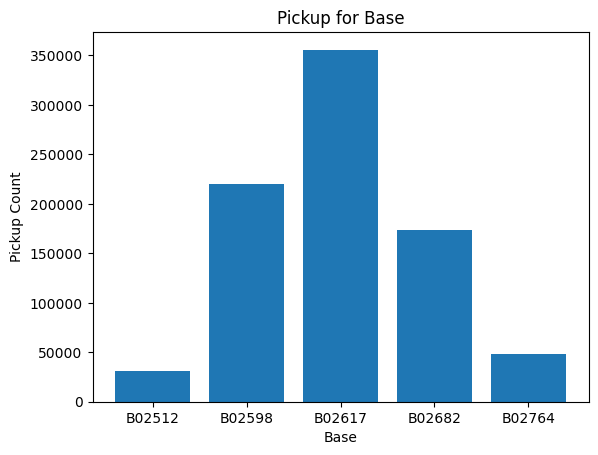

In [78]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
plt.bar(tlc_df['Base'],tlc_df['Count'])   
plt.title('Pickup for Base')
plt.xlabel('Base')
plt.ylabel('Pickup Count')
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

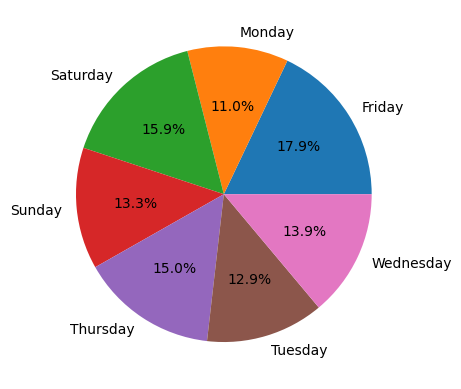

In [95]:
# Group by day of the week and count the number of pickups
df_org['Day'] = df['Date/Time'].dt.day_name()
day_grp = df_org.groupby('Day')['Day'].count()
day_df = pd.DataFrame({'Day':list(day_grp.index), 'Count':list(day_grp)})
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(day_df['Count'], labels=day_df['Day'], autopct='%1.1f%%')
plt.show()